# WeatherPy
----

#### Observations :
* The linear regression plot between Latitude and Temperature proves there is a good correlation, as latitude moves from southpole or northpole towards equator (0) the temperatures increase.
* The northern and southern dataframes signify that there are more datapoints in Northern hemisphere compared to Southern hemisphere. This aligns well with the fact that there is more land in the northern hemisphere, naturally having more number of cities. 
* There is no significant correlation between how Humidity, Cloudiness and Windspeed vary as latitude changes.

In [1]:
import pandas as pd
import json
import requests
from api_keys import weather_api_key
import numpy as np
from citipy import citipy
import random
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

## Generate Cities List

In [2]:
city_list = []
lat_list = []
lng_list = []
for i in range(0,1500):
    lat = np.random.uniform(-90,90)
    lng = np.random.uniform(-180,180)
    city = citipy.nearest_city(lat,lng).city_name 
    if city not in city_list: 
        city_list.append(city)
        lat_list.append(lat)
        lng_list.append(lng)
#     if len(city_list)>=500:
#         break 
        
    
print(len(city_list))
print(len(lat_list))
print(len(lng_list))

636
636
636


In [3]:
cities_df = pd.DataFrame({'Nearest City' : city_list, 'Latitude' : lat_list, 'Longitude': lng_list})
cities_df = cities_df.rename(columns={0:'Nearest City'})
cities_df

,Nearest City,Latitude,Longitude
0,kamenskoye,64.296075,167.810028
1,athmallik,20.416097,84.789184
2,tiksi,82.389401,126.720441
3,tevaitoa,-17.097242,-151.266701
4,otane,-41.631874,178.602784
...,...,...,...
631,pilar,-7.182993,-35.241285
632,vila franca do campo,41.761982,-20.407876
633,makung,23.038803,119.468827
634,chermoz,58.963698,56.462133


In [4]:
cities_df

,Nearest City,Latitude,Longitude
0,kamenskoye,64.296075,167.810028
1,athmallik,20.416097,84.789184
2,tiksi,82.389401,126.720441
3,tevaitoa,-17.097242,-151.266701
4,otane,-41.631874,178.602784
...,...,...,...
631,pilar,-7.182993,-35.241285
632,vila franca do campo,41.761982,-20.407876
633,makung,23.038803,119.468827
634,chermoz,58.963698,56.462133


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?q="

units = 'imperial'

cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

for index, row in cities_df.iterrows():
    query_url = f"{url}{row['Nearest City']}&appid={weather_api_key}&units={units}"
    response = requests.get(query_url).json()
    
    try:
        cities_df.loc[index, 'Temperature (F)'] = response['main']['temp']
        cities_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
    except (KeyError, IndexError):
        print(f"Missing records for City {index+1} of {len(cities_df)} : {row['Nearest City']} ... skipping.")
  

Missing records for City 1 of 636 : kamenskoye ... skipping.
Missing records for City 14 of 636 : amderma ... skipping.
Missing records for City 15 of 636 : satitoa ... skipping.
Missing records for City 74 of 636 : tsihombe ... skipping.
Missing records for City 91 of 636 : illoqqortoormiut ... skipping.
Missing records for City 97 of 636 : mys shmidta ... skipping.
Missing records for City 124 of 636 : meyungs ... skipping.
Missing records for City 125 of 636 : barentsburg ... skipping.
Missing records for City 145 of 636 : anar darreh ... skipping.
Missing records for City 172 of 636 : babanusah ... skipping.
Missing records for City 179 of 636 : marcona ... skipping.
Missing records for City 190 of 636 : taolanaro ... skipping.
Missing records for City 210 of 636 : rungata ... skipping.
Missing records for City 212 of 636 : nizhneyansk ... skipping.
Missing records for City 222 of 636 : saleaula ... skipping.
Missing records for City 225 of 636 : asayita ... skipping.
Missing recor

In [42]:
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,athmallik,20.416097,84.789184,80.60,66.0,100.0,3.67
1,tiksi,82.389401,126.720441,34.23,94.0,100.0,5.53
2,tevaitoa,-17.097242,-151.266701,80.42,69.0,8.0,11.23
3,otane,-41.631874,178.602784,38.01,85.0,100.0,1.83
4,hamilton,30.250444,-70.001038,80.85,58.0,100.0,1.01
...,...,...,...,...,...,...,...
580,usinsk,68.295947,55.985057,36.25,58.0,10.0,7.00
581,pilar,-7.182993,-35.241285,82.33,76.0,93.0,6.17
582,vila franca do campo,41.761982,-20.407876,63.01,74.0,44.0,7.43
583,chermoz,58.963698,56.462133,46.51,71.0,91.0,7.23


In [43]:
# deleting the rows where there are no values for Temperature, temperature being significant data for the cities.
cities_df['Temperature (F)'] = cities_df['Temperature (F)'].replace("", np.nan)
cities_df = cities_df.dropna(axis=0, subset=['Temperature (F)'])
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,athmallik,20.416097,84.789184,80.60,66.0,100.0,3.67
1,tiksi,82.389401,126.720441,34.23,94.0,100.0,5.53
2,tevaitoa,-17.097242,-151.266701,80.42,69.0,8.0,11.23
3,otane,-41.631874,178.602784,38.01,85.0,100.0,1.83
4,hamilton,30.250444,-70.001038,80.85,58.0,100.0,1.01
...,...,...,...,...,...,...,...
580,usinsk,68.295947,55.985057,36.25,58.0,10.0,7.00
581,pilar,-7.182993,-35.241285,82.33,76.0,93.0,6.17
582,vila franca do campo,41.761982,-20.407876,63.01,74.0,44.0,7.43
583,chermoz,58.963698,56.462133,46.51,71.0,91.0,7.23


In [44]:
# resetting the index to get the true list for the actual data retrieved
cities_df = cities_df.reset_index(drop=True)
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,athmallik,20.416097,84.789184,80.60,66.0,100.0,3.67
1,tiksi,82.389401,126.720441,34.23,94.0,100.0,5.53
2,tevaitoa,-17.097242,-151.266701,80.42,69.0,8.0,11.23
3,otane,-41.631874,178.602784,38.01,85.0,100.0,1.83
4,hamilton,30.250444,-70.001038,80.85,58.0,100.0,1.01
...,...,...,...,...,...,...,...
580,usinsk,68.295947,55.985057,36.25,58.0,10.0,7.00
581,pilar,-7.182993,-35.241285,82.33,76.0,93.0,6.17
582,vila franca do campo,41.761982,-20.407876,63.01,74.0,44.0,7.43
583,chermoz,58.963698,56.462133,46.51,71.0,91.0,7.23


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
cities_df.to_csv('Cities_Weather_Data.csv', index=False)

In [46]:
cities_df.dtypes

Nearest City         object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

In [47]:
cities_df['Humidity (%)'] = cities_df['Humidity (%)'].astype(float)
cities_df['Cloudiness (%)'] = cities_df['Cloudiness (%)'].astype(float)
cities_df['Wind Speed (mph)'] = cities_df['Wind Speed (mph)'].astype(float)
cities_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,athmallik,20.416097,84.789184,80.60,66.0,100.0,3.67
1,tiksi,82.389401,126.720441,34.23,94.0,100.0,5.53
2,tevaitoa,-17.097242,-151.266701,80.42,69.0,8.0,11.23
3,otane,-41.631874,178.602784,38.01,85.0,100.0,1.83
4,hamilton,30.250444,-70.001038,80.85,58.0,100.0,1.01
...,...,...,...,...,...,...,...
580,usinsk,68.295947,55.985057,36.25,58.0,10.0,7.00
581,pilar,-7.182993,-35.241285,82.33,76.0,93.0,6.17
582,vila franca do campo,41.761982,-20.407876,63.01,74.0,44.0,7.43
583,chermoz,58.963698,56.462133,46.51,71.0,91.0,7.23


In [48]:
cities_df.dtypes

Nearest City         object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:
cities_df[cities_df['Humidity (%)']>100]

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


None of the cities retrieved have humidity more than 100%.

In [50]:
#  Get the indices of cities that have humidity over 100%.


In [51]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

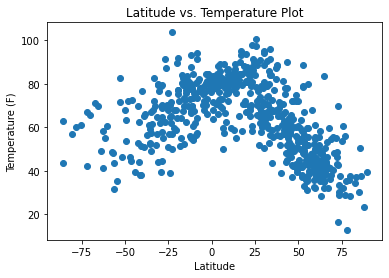

In [52]:
plt.scatter(cities_df['Latitude'], cities_df['Temperature (F)'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Latitude vs. Temperature Plot')
plt.savefig('Pictures/Lat_Temp_Plot.png')
plt.show()

Analysis - The Temperatures increase as the latitude moves from -90 to 0 and from 90 to 0, 0 being the equator, -90 being southpole and 90 being northpole.

## Latitude vs. Humidity Plot

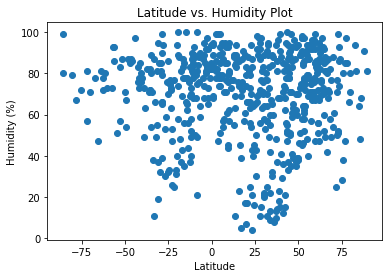

In [53]:
plt.scatter(cities_df['Latitude'], cities_df['Humidity (%)'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity Plot')
plt.savefig('Pictures/Lat_Humid_Plot.png')
plt.show()

Analysis - There is significantly more data in northern hemisphere compared to southern hemisphere. There seems to be no particular correlarion between Latitude and Humidity.  

## Latitude vs. Cloudiness Plot

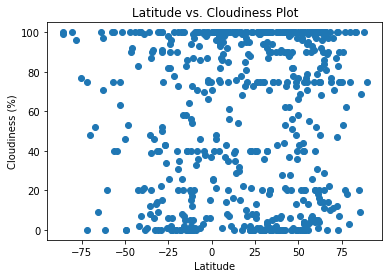

In [54]:
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness (%)'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness Plot')
plt.savefig('Pictures/Lat_Cloud_Plot.png')
plt.show()

Analysis - There seems to be no particular correlarion between Latitude and Cloudiness. 

## Latitude vs. Wind Speed Plot

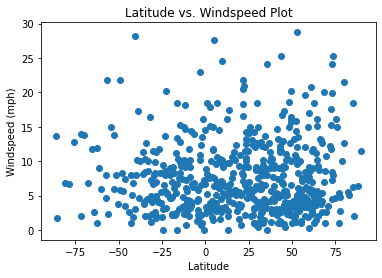

In [55]:
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed (mph)'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Latitude vs. Windspeed Plot')
plt.savefig('Pictures/Lat_Wind_Plot.png')
plt.show()

Analysis - There seems to be no particular correlarion between Latitude and Cloudiness. 

## Linear Regression

In [56]:
#slicing the data for northern hemisphere cities
Northern_df = cities_df[cities_df['Latitude']>0]
Northern_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,athmallik,20.416097,84.789184,80.60,66.0,100.0,3.67
1,tiksi,82.389401,126.720441,34.23,94.0,100.0,5.53
4,hamilton,30.250444,-70.001038,80.85,58.0,100.0,1.01
5,college,68.788801,-146.927538,54.72,49.0,75.0,1.01
6,sanming,26.196324,118.008966,72.19,98.0,75.0,2.04
...,...,...,...,...,...,...,...
579,duluth,46.954017,-91.004916,42.15,65.0,1.0,5.01
580,usinsk,68.295947,55.985057,36.25,58.0,10.0,7.00
582,vila franca do campo,41.761982,-20.407876,63.01,74.0,44.0,7.43
583,chermoz,58.963698,56.462133,46.51,71.0,91.0,7.23


In [57]:
#slicing the data for southern hemisphere cities
Southern_df = cities_df[cities_df['Latitude']<0]
Southern_df

,Nearest City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
2,tevaitoa,-17.097242,-151.266701,80.42,69.0,8.0,11.23
3,otane,-41.631874,178.602784,38.01,85.0,100.0,1.83
7,atuona,-12.026456,-127.140854,79.14,73.0,15.0,14.61
9,busselton,-61.447663,83.365123,55.04,80.0,0.0,8.93
11,punta arenas,-54.477590,-92.903418,35.42,51.0,40.0,14.97
...,...,...,...,...,...,...,...
562,alice springs,-24.024663,136.689981,38.75,75.0,90.0,6.60
563,melipilla,-33.762794,-71.340277,67.84,38.0,91.0,4.50
565,nisia floresta,-3.255306,-25.509366,84.58,80.0,6.0,10.96
566,puerto leguizamo,-1.905697,-75.324827,84.54,68.0,66.0,1.03


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

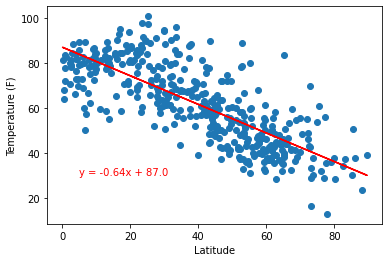

In [58]:
x = Northern_df['Latitude']
y = Northern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(5,30),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Pictures/NH_Linregress_Lat_Temp_Plot.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

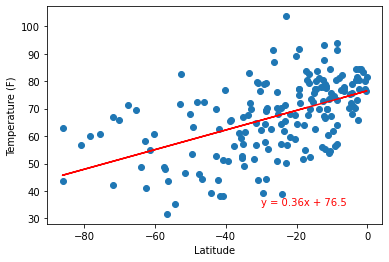

In [59]:
x = Southern_df['Latitude']
y = Southern_df['Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-30,35),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Pictures/SH_Linregress_Lat_Temp_Plot.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

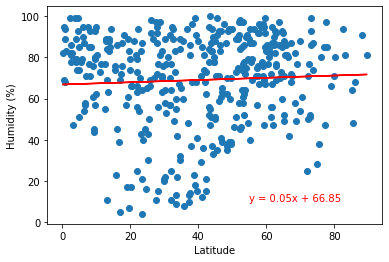

In [60]:
x = Northern_df['Latitude']
y = Northern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(55,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Pictures/NH_Linregress_Lat_Humid_Plot.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

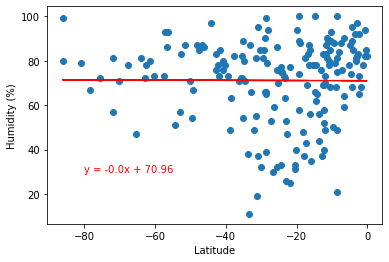

In [61]:
x = Southern_df['Latitude']
y = Southern_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-80,30),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Pictures/SH_Linregress_Lat_Humid_Plot.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

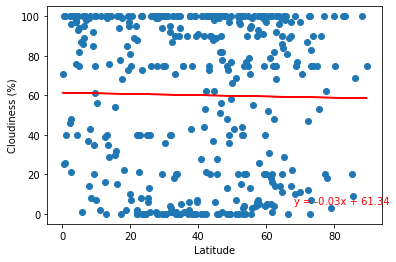

In [62]:
x = Northern_df['Latitude']
y = Northern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(68,5),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Pictures/NH_Linregress_Lat_Cloud_Plot.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

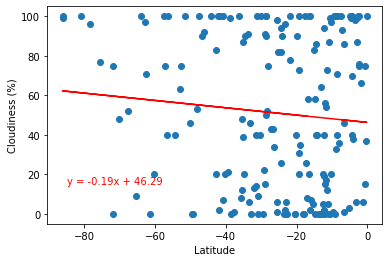

In [63]:
x = Southern_df['Latitude']
y = Southern_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-85,15),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Pictures/SH_Linregress_Lat_Cloud_Plot.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

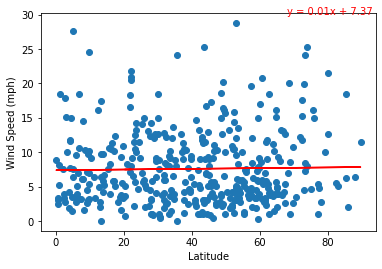

In [64]:
x = Northern_df['Latitude']
y = Northern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(68,30),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Pictures/NH_Linregress_Lat_Wind_Plot.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

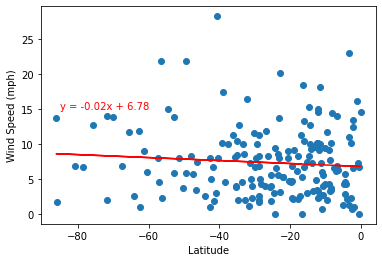

In [65]:
x = Southern_df['Latitude']
y = Southern_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_value = x*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_value,"r-")
plt.annotate(line_eq,(-85,15),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Pictures/SH_Linregress_Lat_Wind_Plot.png')
plt.show()